/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.2642 - loss: 2.4558 - val_accuracy: 0.7821 - val_loss: 0.7107
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.7724 - loss: 0.6879 - val_accuracy: 0.8579 - val_loss: 0.4446
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.8732 - loss: 0.3761 - val_accuracy: 0.8837 - val_loss: 0.3828
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9177 - loss: 0.2380 - val_accuracy: 0.9011 - val_loss: 0.3751
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.9408 - loss: 0.1709 - val_accuracy: 0.9011 - val_loss: 0.3231
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9540 - loss: 0.1326 - val_accuracy: 0.9080 - val_loss: 0.3530
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.9585 - loss: 0.1222 - val_accuracy: 0.9099 - val_loss: 0.3467
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.9641 - loss: 0.1021 - 

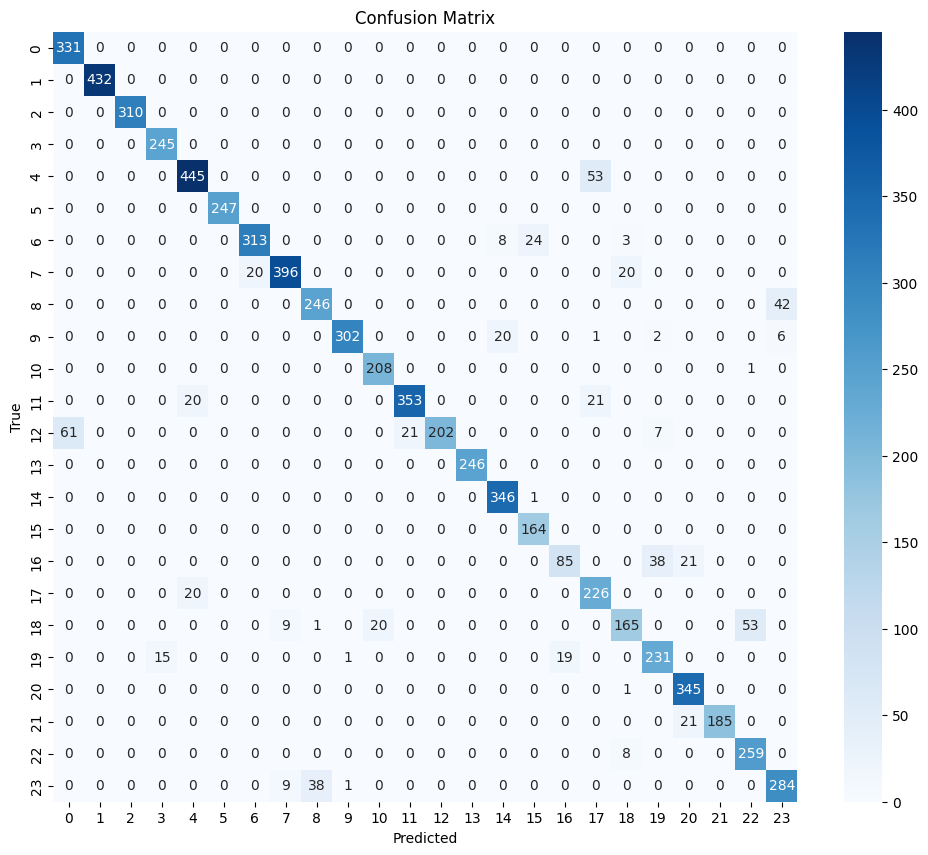

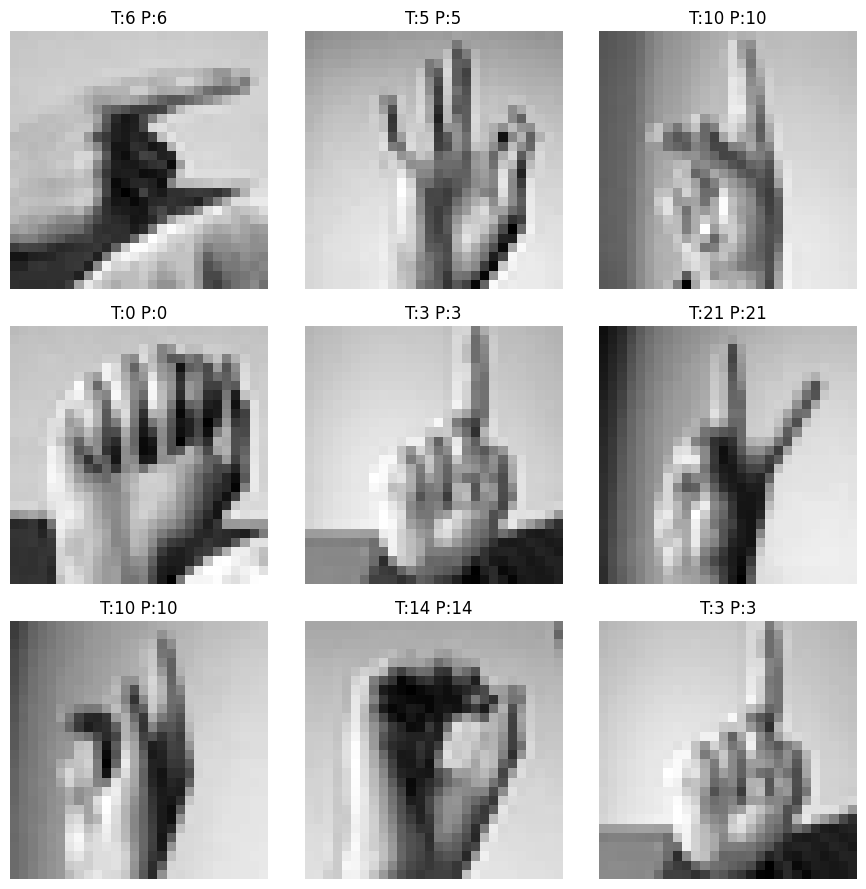

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

train_df = pd.read_csv("/content/sign_mnist_train[1].csv")
test_df = pd.read_csv("/content/sign_mnist_test[1].csv")

X_train = train_df.drop("label", axis=1).values / 255.0
y_train = train_df["label"].values
X_test = test_df.drop("label", axis=1).values / 255.0
y_test = test_df["label"].values

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

num_classes = np.max(y_train) + 1
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat), batch_size=64)

loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {acc * 100:.2f}%")

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title(f"T:{y_test[i]} P:{y_pred_classes[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()